## Import Data


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:

# Load data
data = pd.read_csv("DukuhKupang.csv")
print("Data awal:")
print(data.info())

# Drop kolom yang tidak dipakai
drop_cols = ['Datetime','Timezone','AQI CN','AQI US',
             'HCHO (ppb)','TVOC (ppb)','Temperature (Fahrenheit)']
data = data.drop(columns=drop_cols)

Data awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40043 entries, 0 to 40042
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timezone                  40043 non-null  object 
 1   Datetime                  40043 non-null  object 
 2   AQI US                    40043 non-null  int64  
 3   AQI CN                    40043 non-null  int64  
 4   PM2.5 (ug/m3)             40043 non-null  float64
 5   PM10 (ug/m3)              40043 non-null  int64  
 6   CO2 (ppm)                 40043 non-null  int64  
 7   Temperature (Celsius)     40043 non-null  float64
 8   Temperature (Fahrenheit)  40043 non-null  float64
 9   Humidity (%)              40043 non-null  int64  
 10  HCHO (ppb)                0 non-null      float64
 11  TVOC (ppb)                0 non-null      float64
dtypes: float64(5), int64(5), object(2)
memory usage: 3.7+ MB
None


In [15]:
print(data.isna().sum())
print(data.isnull().sum())
print(data.duplicated().sum())

PM2.5 (ug/m3)            0
PM10 (ug/m3)             0
CO2 (ppm)                0
Temperature (Celsius)    0
Humidity (%)             0
dtype: int64
PM2.5 (ug/m3)            0
PM10 (ug/m3)             0
CO2 (ppm)                0
Temperature (Celsius)    0
Humidity (%)             0
dtype: int64
1227


In [16]:
data = data.dropna()
data = data.drop_duplicates()
data.duplicated().sum()

0

In [17]:
# Hapus missing values & duplicate
data = data.dropna().drop_duplicates()
print("Data setelah drop NA & duplicate:", data.shape)

Data setelah drop NA & duplicate: (38816, 5)


In [18]:
data.describe(

)

,PM2.5 (ug/m3),PM10 (ug/m3),CO2 (ppm),Temperature (Celsius),Humidity (%)
count,38816.000000,38816.000000,38816.000000,38816.000000,38816.000000
mean,39.754854,76.841019,430.722795,28.753156,79.632471
std,33.911649,67.678937,21.410946,3.631565,12.615942
min,3.000000,3.000000,390.000000,23.800000,41.000000
25%,19.000000,36.000000,416.000000,26.000000,72.000000
50%,30.000000,57.000000,426.000000,27.500000,83.000000
75%,49.000000,92.000000,440.000000,30.700000,90.000000
max,1798.800000,2000.000000,628.000000,41.500000,97.000000


In [20]:
## cek data Oulier

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_indices = data[(data < lower_bound) | (data > upper_bound)].dropna(how='all').index
print(f"Number of potential outliers detected: {len(outlier_indices)}")

Number of potential outliers detected: 5015


In [21]:
## Hapus data Oulier
data_cleaned_looped = data.copy() # Create a copy to avoid modifying the original data

while True:
    Q1 = data_cleaned_looped.quantile(0.25)
    Q3 = data_cleaned_looped.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_indices = data_cleaned_looped[(data_cleaned_looped < lower_bound) | (data_cleaned_looped > upper_bound)].dropna(how='all').index

    if len(outlier_indices) == 0:
        print("No more outliers detected.")
        break
    else:
        print(f"Removing {len(outlier_indices)} potential outliers.")
        data_cleaned_looped = data_cleaned_looped.drop(outlier_indices)

print(f"Number of rows after removing outliers iteratively: {len(data_cleaned_looped)}")
display(data_cleaned_looped.head())

Removing 5015 potential outliers.
Removing 2056 potential outliers.
Removing 984 potential outliers.
Removing 430 potential outliers.
Removing 228 potential outliers.
Removing 134 potential outliers.
Removing 169 potential outliers.
Removing 276 potential outliers.
Removing 78 potential outliers.
No more outliers detected.
Number of rows after removing outliers iteratively: 29446


,PM2.5 (ug/m3),PM10 (ug/m3),CO2 (ppm),Temperature (Celsius),Humidity (%)
25,16.0,35,427,37.6,49
26,12.0,30,426,37.6,48
27,16.0,35,422,37.5,50
28,12.0,18,421,37.3,49
29,11.0,13,424,37.1,50


In [22]:
data_cleaned_looped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29446 entries, 25 to 40042
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PM2.5 (ug/m3)          29446 non-null  float64
 1   PM10 (ug/m3)           29446 non-null  int64  
 2   CO2 (ppm)              29446 non-null  int64  
 3   Temperature (Celsius)  29446 non-null  float64
 4   Humidity (%)           29446 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.3 MB


<Axes: >

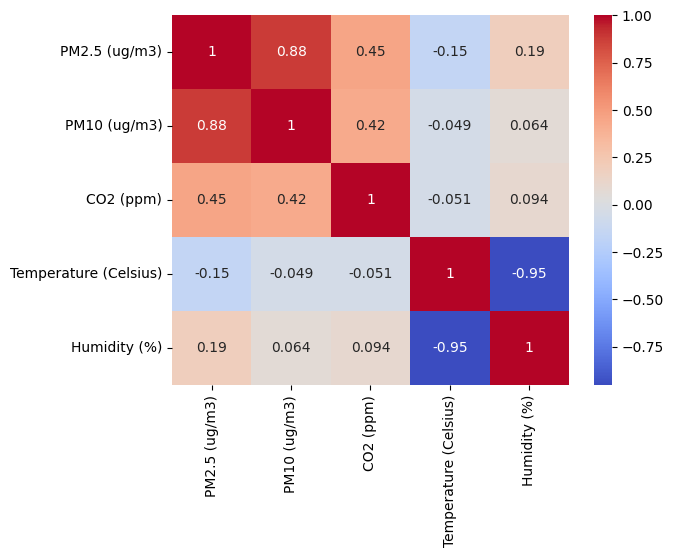

In [23]:
## Heatmap Data
import seaborn as sns
sns.heatmap(data_cleaned_looped.corr(), annot=True, cmap='coolwarm')

# Prepocessing

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Asumsikan data_cleaned_looped adalah data numerik yang sudah dibersihkan
X = data_cleaned_looped.copy()

# Split sebelum apa pun!
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42, stratify=None)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # FIT HANYA DI SINI
X_test_scaled = scaler.transform(X_test)         # HANYA TRANSFORM, TIDAK FIT

Clustering progress:  11%|█         | 1/9 [00:04<00:36,  4.57s/it]

k=2, Silhouette Score=0.2913


Clustering progress:  22%|██▏       | 2/9 [00:09<00:32,  4.58s/it]

k=3, Silhouette Score=0.3375


Clustering progress:  33%|███▎      | 3/9 [00:13<00:26,  4.37s/it]

k=4, Silhouette Score=0.2775


Clustering progress:  44%|████▍     | 4/9 [00:17<00:20,  4.15s/it]

k=5, Silhouette Score=0.2715


Clustering progress:  56%|█████▌    | 5/9 [00:21<00:16,  4.16s/it]

k=6, Silhouette Score=0.2718


Clustering progress:  67%|██████▋   | 6/9 [00:25<00:12,  4.15s/it]

k=7, Silhouette Score=0.2597


Clustering progress:  78%|███████▊  | 7/9 [00:29<00:08,  4.08s/it]

k=8, Silhouette Score=0.2471


Clustering progress:  89%|████████▉ | 8/9 [00:33<00:04,  4.17s/it]

k=9, Silhouette Score=0.2396


Clustering progress: 100%|██████████| 9/9 [00:37<00:00,  4.21s/it]

k=10, Silhouette Score=0.2338


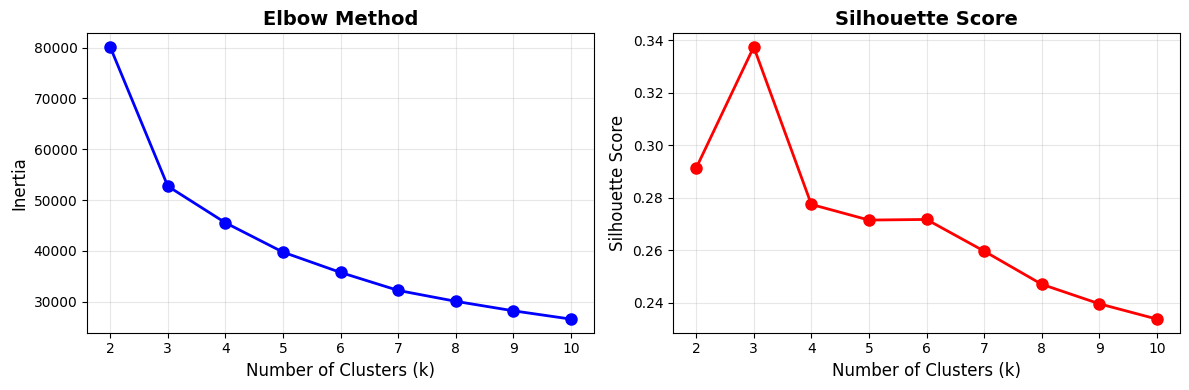

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm import tqdm

inertias = []
sil_scores = []
K_range = range(2, 11)

# Loop untuk setiap nilai k
for k in tqdm(K_range, desc="Clustering progress"):
    # Latih K-Means pada data yang sudah di-scale
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_temp = kmeans_temp.fit_predict(X_train_scaled)
    
    # Simpan inertia
    inertias.append(kmeans_temp.inertia_)
    
    # Hitung Silhouette Score pada data yang SAMA (X_train_scaled)
    sil_score = silhouette_score(X_train_scaled, labels_temp)
    sil_scores.append(sil_score)
    
    # Print hasil untuk setiap k
    print(f"k={k}, Silhouette Score={sil_score:.4f}")

# Plot hasil
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot Elbow Method
ax[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Number of Clusters (k)', fontsize=12)
ax[0].set_ylabel('Inertia', fontsize=12)
ax[0].grid(True, alpha=0.3)

# Plot Silhouette Score
ax[1].plot(K_range, sil_scores, 'ro-', linewidth=2, markersize=8)
ax[1].set_title('Silhouette Score', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Number of Clusters (k)', fontsize=12)
ax[1].set_ylabel('Silhouette Score', fontsize=12)
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [27]:
# === 5. Pilih jumlah cluster, misal k=3 ===
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_train_scaled) # HANYA FIT PADA TRAIN

KMeans(n_clusters=3, n_init=10, random_state=42)

In [31]:
# Assign cluster ke Train & Test
train_clusters = kmeans.predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)   # HANYA PREDICT, TIDAK FIT

         PM2.5 (ug/m3)  PM10 (ug/m3)   CO2 (ppm)  Temperature (Celsius)  \
Cluster                                                                   
0            43.726669     80.978531  433.330685              27.714345   
1            21.308060     43.146950  419.848894              33.168116   
2            21.389592     38.096724  417.672196              26.605712   

         Humidity (%)  
Cluster                
0           83.101771  
1           63.629954  
2           86.604396  


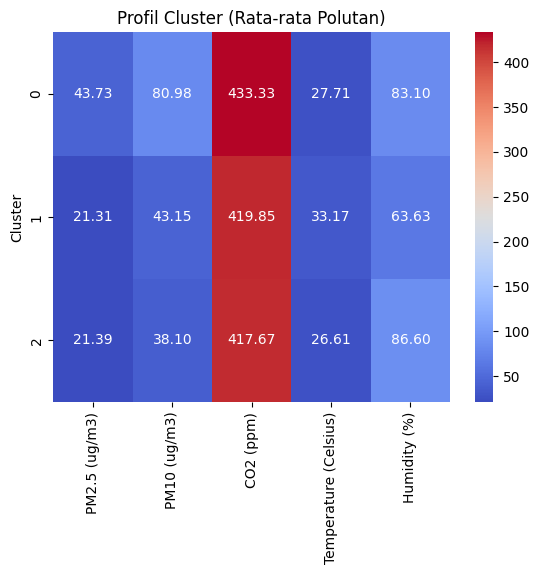

In [32]:
# Tambahkan ke dataframe
X_train["Cluster"] = train_clusters
X_test["Cluster"] = test_clusters

# === 6. Profil cluster ===
cluster_profile = X_train.groupby("Cluster").mean()
print(cluster_profile)

sns.heatmap(cluster_profile, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Profil Cluster (Rata-rata Polutan)")
plt.show()

In [33]:
# === 1. Jumlah data per cluster ===
print("Jumlah data per cluster:")
print(pd.Series(train_clusters).value_counts())

Jumlah data per cluster:
2    9646
0    7173
1    6737
Name: count, dtype: int64


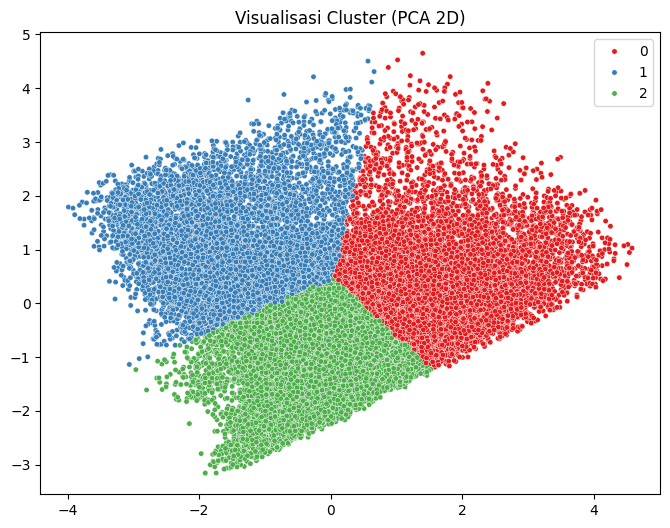

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
# === 2. Scatterplot cluster (PCA 2D) ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=train_clusters, palette="Set1", s=15)
plt.title("Visualisasi Cluster (PCA 2D)")
plt.show()

In [35]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate clustering performance
# Silhouette Score: Higher value means better defined clusters (range -1 to 1)
silhouette_avg = silhouette_score(X_train_scaled, train_clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index: Lower value means better clustering (0 indicates perfect separation)
db_index = davies_bouldin_score(X_train_scaled, train_clusters)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.337501056485859
Davies-Bouldin Index: 1.030346354353812


AQI_Category  Good  Moderate  Satisfactory
Cluster                                   
0              108      1396          5669
1             4479        43          2215
2             7176         2          2468


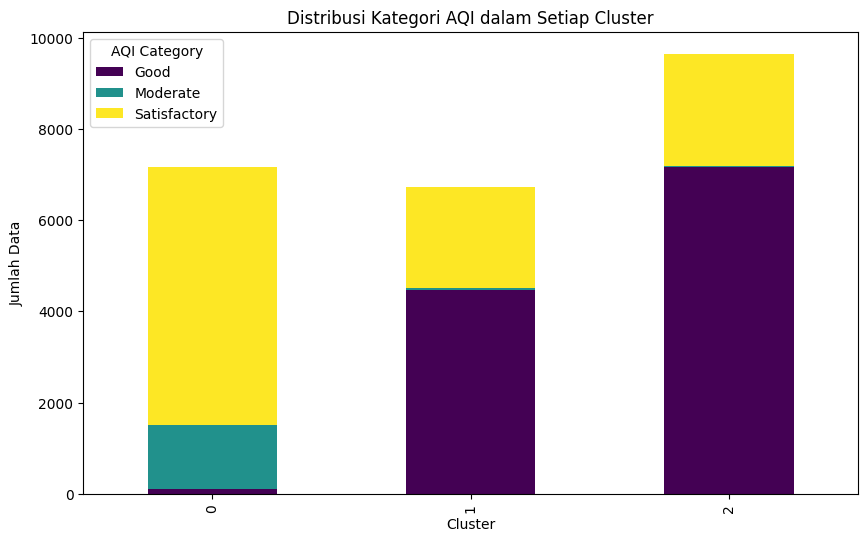

In [36]:
def aqi_pm25(value):
    if value <= 30: return "Good"
    elif value <= 60: return "Satisfactory"
    elif value <= 90: return "Moderate"
    elif value <= 120: return "Poor"
    elif value <= 250: return "Very Poor"
    else: return "Severe"

# Fungsi kategori AQI PM10
def aqi_pm10(value):
    if value <= 50: return "Good"
    elif value <= 100: return "Satisfactory"
    elif value <= 250: return "Moderate"
    elif value <= 350: return "Poor"
    elif value <= 430: return "Very Poor"
    else: return "Severe"

# Tentukan AQI akhir (ambil kategori terburuk antara PM2.5 & PM10)
def calculate_aqi(row):
    cat_pm25 = aqi_pm25(row["PM2.5 (ug/m3)"])
    cat_pm10 = aqi_pm10(row["PM10 (ug/m3)"])
    categories = ["Good", "Satisfactory", "Moderate", "Poor", "Very Poor", "Severe"]
    return max([cat_pm25, cat_pm10], key=lambda x: categories.index(x))

# Tambahkan kategori AQI
X_train["AQI_Category"] = X_train.apply(calculate_aqi, axis=1)

# Crosstab cluster vs AQI
cluster_summary = pd.crosstab(X_train["Cluster"], X_train["AQI_Category"])
print(cluster_summary)

# Plot distribusi
cluster_summary.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")
plt.title("Distribusi Kategori AQI dalam Setiap Cluster")
plt.xlabel("Cluster"); plt.ylabel("Jumlah Data")
plt.legend(title="AQI Category")
plt.show()

In [37]:
from sklearn.metrics import adjusted_rand_score

# Label asli = kategori AQI
true_labels = X_train["AQI_Category"]

# Label hasil clustering
pred_labels = X_train["Cluster"]

# Hitung ARI
ari_score = adjusted_rand_score(true_labels, pred_labels)
print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")

Adjusted Rand Index (ARI): 0.2381
